# Quantitative Trading Course
## _Imperial Blockchain Group_
### Lecture 2 - An introduction to Crypto Financial Instruments, Binance's Exchange API & Algo Trading Basics
#### Lead Instructor: **Ahmad Danesh & Naman Sharma**

### Automated Market Makers

Imagine you have a lemonade stand and you want to sell your lemonade at a fair price based on the supply (lemons and sugar you have) and demand (customers who want to buy lemonade). An AMM algorithm works in a similar way, but instead of you setting the price, it uses a mathematical formula to automatically determine the price based on supply and demand.

Just like a human market maker, an AMM takes into account how much of the asset is available for purchase (supply) and how much people want to buy (demand) to determine the price. 

The code provided below is an example of how an AMM algorithm could be represented using Python. The variable k is set to a value of 1000 and represents the total supply of the asset. The `x_range` variable is set to a range of numbers from 1 to 100, which represents the demand for the asset. The `y_range` variable is an empty list that will be used to store the calculated prices of the asset.

The for loop iterates through the `x_range` and calculates the price of the asset using the formula `y = k / x`. The calculated price is then appended to the y_range list.

>K = A constant: The balance of assets

>X = amount of asset A being traded

>Y = amount of asset B being traded

Note that this is the formula for a constant product market maker and there are a few more common alternatives such as Curve's Stableswap variant. 

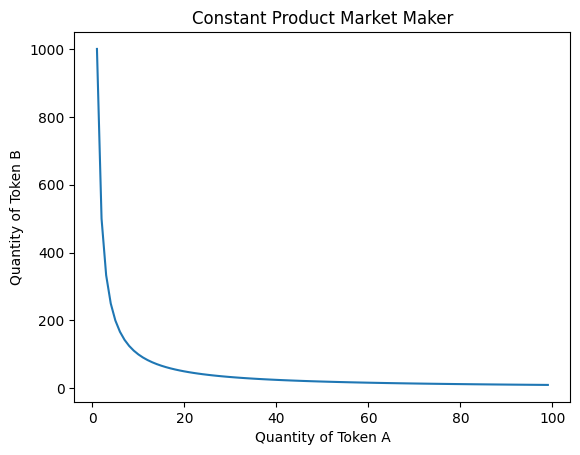

In [296]:
import matplotlib.pyplot as plt

k = 1000

x_range = range(1, 100)

y_range = []
for x in x_range:
    y = k / x
    y_range.append(y)

plt.plot(x_range, y_range)
plt.title('Constant Product Market Maker')
plt.xlabel('Quantity of Token A')
plt.ylabel('Quantity of Token B');

### Using the Binance API

Before we start, let's install/upgrade some relevant libraries - usually you will start coding and then your output will tell you that you have not imported certain libraries in which you go back and do so. 

* **binance-connector**: this is for the lightweight python client that we will be using briefly
* **plotly**: this is a popular plotting library
* **seaborn**: this is another popular plotting library
* **nbformat**: this library contains the base implementation of the Jupyter Notebook format 

In [297]:
!pip install binance-connector
!pip install python-binance
!pip install plotly
!pip install seaborn
!pip install --upgrade nbformat

Cool! In 2017, Binance held a competition for contestants to create lightweight clients in multiple languages. python-binance won the best python implementation. We will now demonstrate how to use it. You can find more info on it here: https://github.com/binance/binance-connector-python

In [298]:
from binance.spot import Spot as Client
import pandas as pd

spot_client = Client(base_url='https://testnet.binance.vision')

In [299]:
info = spot_client.exchange_info(symbol="BNBUSDT")
info

{'timezone': 'UTC',
 'serverTime': 1675014293933,
 'rateLimits': [{'rateLimitType': 'REQUEST_WEIGHT',
   'interval': 'MINUTE',
   'intervalNum': 1,
   'limit': 1200},
  {'rateLimitType': 'ORDERS',
   'interval': 'SECOND',
   'intervalNum': 10,
   'limit': 50},
  {'rateLimitType': 'ORDERS',
   'interval': 'DAY',
   'intervalNum': 1,
   'limit': 160000}],
 'exchangeFilters': [],
 'symbols': [{'symbol': 'BNBUSDT',
   'status': 'TRADING',
   'baseAsset': 'BNB',
   'baseAssetPrecision': 8,
   'quoteAsset': 'USDT',
   'quotePrecision': 8,
   'quoteAssetPrecision': 8,
   'baseCommissionPrecision': 8,
   'quoteCommissionPrecision': 8,
   'orderTypes': ['LIMIT',
    'LIMIT_MAKER',
    'MARKET',
    'STOP_LOSS_LIMIT',
    'TAKE_PROFIT_LIMIT'],
   'icebergAllowed': True,
   'ocoAllowed': True,
   'quoteOrderQtyMarketAllowed': True,
   'allowTrailingStop': True,
   'cancelReplaceAllowed': True,
   'isSpotTradingAllowed': True,
   'isMarginTradingAllowed': False,
   'filters': [{'filterType': 'PRIC

When interacting with APIs you usually need an API Key for security purposes and access to the endpoint. Because we are using Binance's testnet, it does not matter so much but it is good practice to connect via your api key and private key you generated. 

In [300]:
# define api_key and secret_key - note you would usually store these as environment variables for security
api_key = 'sGr06NNZGJ8D5FsAvl7lP3AJfeLCpu6odbtdDFpyWBpMNHuDmVHJtDaSMROEbmtY'
api_secret = '0Uwz8X1YZJPfOKu3f2VznfEueDyvtFL4j9KFdJExomXH1jLCpGgnVv2adn1QLyra'


from binance.client import Client
client = Client(api_key, api_secret, testnet=True)

In [301]:
tickers = client.get_all_tickers()
tickers = pd.DataFrame(tickers)
tickers

symbol           price
0   BNBBUSD    318.50000000
1   BTCBUSD  23606.07000000
2   ETHBUSD   1616.80000000
3   LTCBUSD     95.49000000
4   TRXBUSD      0.06345000
5   XRPBUSD      0.41420000
6   BNBUSDT    318.40000000
7   BTCUSDT  23604.25000000
8   ETHUSDT   1616.59000000
9   LTCUSDT     95.46000000
10  TRXUSDT      0.06343000
11  XRPUSDT      0.41420000
12   BNBBTC      0.01349700
13   ETHBTC      0.06850000
14   LTCBTC      0.00404400
15   TRXBTC      0.00000269
16   XRPBTC      0.00001755
17   LTCBNB      0.29950000
18   TRXBNB      0.00019910
19   XRPBNB      0.00129900

Alternatively, you can also connect to Binance's API by calling their endpoint directly instead of replying on a third-party lightweight client. This is generally seen as a much better approach given you are exposed to a much wider range of functionality and are not at risk to missing out on the API's updated functionalities. 

An API (Application Programming Interface) is a set of protocols, routines, and tools for building software and applications. It enables different applications to communicate with each other and exchange data.

1. `import requests and import json` - these two libraries are imported to allow for making API calls and parsing the response data in a readable format.

2. `url = 'https://api1.binance.com'` - this sets the URL of the API endpoint being called to 'https://api1.binance.com'.

3. `api_call = '/api/v3/ticker/price'` - this sets the specific API call being made to /api/v3/ticker/price, which retrieves the price information for a specific ticker symbol.

4. `headers = {'content-type': 'application/json', 'X-MBX-APIKEY': api_key}` - Headers are a part of the HTTP request or response that contain metadata about the request or response payload. They are used to provide additional information about the request or response, such as content type, encoding, and authentication information.

5. `response = requests.get(url + api_call, headers=headers)` - this line makes the actual API call using the requests.get() method and passing in the URL and headers. The response from the API is stored in the response variable.

6. `response = json.loads(response.text)` - this line parses the response data, which is in JSON format, into a Python dictionary using the json.loads() method.

7. `df = pd.DataFrame.from_records(response)` - this line converts the parsed JSON data into a Pandas DataFrame for easier manipulation and analysis.


In [302]:
import requests
import json

url = 'https://api1.binance.com'

api_call = '/api/v3/ticker/price'

headers = {'content-type': 'application/json', 
           'X-MBX-APIKEY': api_key}

response = requests.get(url + api_call, headers=headers)
response = json.loads(response.text)
df = pd.DataFrame.from_records(response)
df

symbol        price
0       ETHBTC   0.06848200
1       LTCBTC   0.00404400
2       BNBBTC   0.01349700
3       NEOBTC   0.00035600
4      QTUMETH   0.00166900
...        ...          ...
2139    RPLBTC   0.00166500
2140   RPLBUSD  39.49000000
2141   RPLUSDT  39.51000000
2142  PROSUSDT   0.66710000
2143    FETTRY   5.46300000

[2144 rows x 2 columns]

### Opening A Trade

Opening a trade directly with the Binance API requires a websocket connection which is out of the scope of this seris. For this part, we will use the lightweight python client. 

First, we'll view our balance

In [303]:
from binance.client import Client

client = Client(api_key, api_secret, testnet=True)
df_before = pd.DataFrame(client.get_account()['balances'])
print(df_before)

  asset             free      locked
0   BNB    1000.00000000  0.00000000
1   BTC       1.01500000  0.00000000
2  BUSD    9654.20325000  0.00000000
3   ETH     106.00000000  0.00000000
4   LTC     503.00000000  0.00000000
5   TRX  500000.00000000  0.00000000
6  USDT      69.83602250  0.00000000
7   XRP   50000.00000000  0.00000000


We can create a buy limit order, which specifies a price at which we would like our order to execute at. In this example we want to buy ETHUSDT when ETH = $1000 USDT

In [311]:
buy_order_limit = client.create_test_order(
    symbol='ETHBTC',
    side='BUY',
    type='LIMIT',
    timeInForce='GTC',
    price = 0.07 ,
    quantity=1)

Let's do a market order, which means we want the trade to execute at current market prices

In [312]:
buy_order = client.create_test_order(symbol='ETHUSDT', side='BUY', type='MARKET', quantity=1)

If there are no errors with the test order, we can execute an actual trade:

In [314]:
buy = client.create_order(
    symbol='ETHBTC',
    side='BUY',
    type='MARKET',
    quantity=1)

df_after_trade = pd.DataFrame(client.get_account()['balances'])
print(df_after_trade)

  asset             free      locked
0   BNB    1000.00000000  0.00000000
1   BTC       0.94644481  0.00000000
2  BUSD    9654.20325000  0.00000000
3   ETH     107.00000000  0.00000000
4   LTC     503.00000000  0.00000000
5   TRX  500000.00000000  0.00000000
6  USDT      69.83602250  0.00000000
7   XRP   50000.00000000  0.00000000


You should see your balance for one asset go up by the specific quantity and another asset decrease 

In [315]:
df_after_trade['difference'] = df_after_trade['free'].astype(float) - df_before['free'].astype(float)
df_after_trade

asset             free      locked  difference
0   BNB    1000.00000000  0.00000000    0.000000
1   BTC       0.94644481  0.00000000   -0.068555
2  BUSD    9654.20325000  0.00000000    0.000000
3   ETH     107.00000000  0.00000000    1.000000
4   LTC     503.00000000  0.00000000    0.000000
5   TRX  500000.00000000  0.00000000    0.000000
6  USDT      69.83602250  0.00000000    0.000000
7   XRP   50000.00000000  0.00000000    0.000000

### Fetching Market Data

The Binance API has a kline/candlestick endpoint which allows to get the open, high, low and close prices for an asset at different times. Let's get the hourly price data for BTCUSDT

In [316]:
from binance.spot import Spot as Client
import pandas as pd
spot_client = Client(base_url='https://testnet.binance.vision')


columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore']

df = pd.DataFrame(spot_client.ui_klines("BTCUSDT", "1h"), columns=columns)

In [317]:
df

Open Time            Open            High             Low  \
0    1673215200000  16957.34000000  17395.98000000  16952.97000000   
1    1673218800000  16963.27000000  17567.71000000  16409.34000000   
2    1673222400000  17128.84000000  17828.23000000  16574.21000000   
3    1673226000000  17186.39000000  17940.24000000  16662.53000000   
4    1673229600000  17174.78000000  17663.31000000  16409.34000000   
..             ...             ...             ...             ...   
495  1674997200000  23478.17000000  23654.21000000  23463.62000000   
496  1675000800000  23536.87000000  23590.37000000  23000.00000000   
497  1675004400000  23538.06000000  23548.34000000  23473.11000000   
498  1675008000000  23523.40000000  23644.83000000  23474.07000000   
499  1675011600000  23585.03000000  32781.26000000  16148.60000000   

              Close        Volume     Close Time Quote Asset Volume  \
0    16963.09000000  334.80550600  1673218799999   5679767.34523179   
1    17128.81000000  496.18859900  1673222399999   8456251.24469765   
2    17186.39000000  552.11040700  1673225999999   9466903.57005935   
3    17175.01000000  451.82605400  1673229599999   7759151.77238258   
4    17191.22000000  498.17119700  1673233199999   8570242.53577018   
..              ...           ...            ...                ...   
495  23536.21000000  340.69338300  1675000799999   8025720.22749147   
496  23538.03000000  327.47957500  1675004399999   7699862.80412008   
497  23523.69000000  295.05578900  1675007999999   6938394.51141202   
498  23585.05000000  308.21593300  1675011599999   7256556.33994419   
499  23596.51000000  260.46506400  1675015199999   6146635.59522755   

     Number of Trades Taker buy base asset volume  \
0                5016                234.83750600   
1                7486                345.52498300   
2                7862                367.47829000   
3                6809                311.35265500   
4                7641                341.66075400   
..                ...                         ...   
495              9444                229.44097000   
496              8275                209.37248100   
497              7526                187.81617100   
498              7747                211.18387700   
499              6330                176.94207800   

    Taker buy quote asset volume Ignore  
0               3983908.95852941      0  
1               5889355.17863999      0  
2               6302757.05778044      0  
3               5347323.98225559      0  
4               5877950.02067994      0  
..                           ...    ...  
495             5404908.12051158      0  
496             4922922.88936020      0  
497             4416615.19734813      0  
498             4971852.00468291      0  
499             4175784.83390519      0  

[500 rows x 12 columns]

Some of the columns are not in a format which allow for data transformations, calcualtions and plotting. For example, the `Open Time` column is of an integer type and not a datetime type. 

In [318]:
print(df['Open Time'])

0      1673215200000
1      1673218800000
2      1673222400000
3      1673226000000
4      1673229600000
           ...      
495    1674997200000
496    1675000800000
497    1675004400000
498    1675008000000
499    1675011600000
Name: Open Time, Length: 500, dtype: int64


Let's convert the `Open Time` column with the **pd.to_datetime()** method, specifying milliseconds as the smallest unit we want to store

In [319]:
df['Open Time'] = pd.to_datetime(df['Open Time'], unit='ms')
print(df['Open Time'])

0     2023-01-08 22:00:00
1     2023-01-08 23:00:00
2     2023-01-09 00:00:00
3     2023-01-09 01:00:00
4     2023-01-09 02:00:00
              ...        
495   2023-01-29 13:00:00
496   2023-01-29 14:00:00
497   2023-01-29 15:00:00
498   2023-01-29 16:00:00
499   2023-01-29 17:00:00
Name: Open Time, Length: 500, dtype: datetime64[ns]


We should also convert the `Open, High, Low, Close` columns from strings to floats - we do this by using the **apply()** function and passing in the **pd.to_numeric()** funciton into it. 

In [320]:
df[['Open', 'High', 'Low', 'Close']] = df[['Open', 'High', 'Low', 'Close']].apply(pd.to_numeric)

We can now try plotting this data using pandas' plot function:

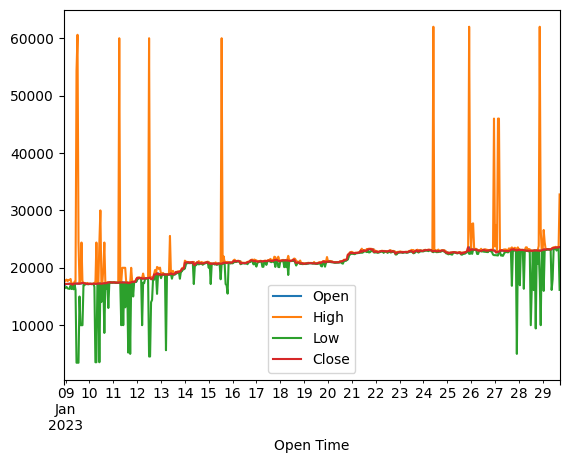

In [321]:
df.plot(x='Open Time', y=['Open', 'High', 'Low', 'Close'], kind='line');

This is a very messy visualiation and it is hard to extract any information out of it. Alternatively, we can use **the plotly library which has a graph_objects class that has a Candlestick plot function**:

In [322]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df['Open Time'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

These large wicks aren't helpful, you can see if i plot the wick sizes - some candles move more than $1000 within an hour which has never happened in a long time. So let's remove them to keep the candles that seem right. 

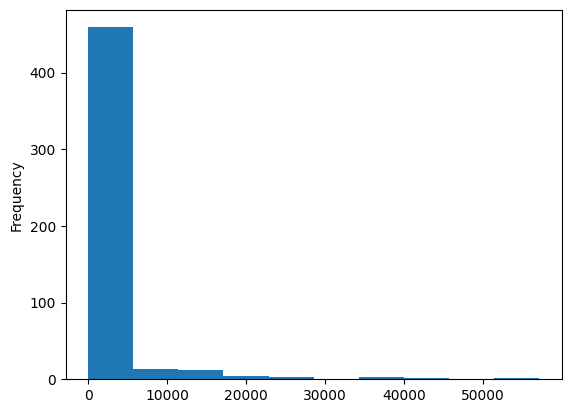

In [323]:
# some of these candles have unusually large wicks - i want to remove them
# first, i want to see the distribution of wick sizes

df['Wick'] = df['High'] - df['Low']
df['Wick'].plot(kind='hist');

In [324]:
# now i want to remove the candles with wicks larger than 1000
df = df[df['Wick'] < 1000]

In [325]:
fig = go.Figure(data=[go.Candlestick(x=df['Open Time'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])
# i want to change the axis so it displays from 0 to the highest value of df['High] + 100 on the y axis

fig.update_layout(yaxis_range=[df['Low'].min() - 2000, df['High'].max() + 2000])
fig.show()


This is slightly better but ideally we should not have to do this filtering. These wicks may come up because Binance's testnet data isn't of the best quality. Given we are not so concerned with streaming live prices as of now, we can just use yahoo finance's API and use this data for the rest of the session. 

In [326]:
import yfinance as yf

# Define the ticker symbol for Bitcoin
btc = yf.Ticker("BTC-USD")

# Get the historical price data for Bitcoin
btc_data = btc.history(period="1d", start="2019-01-01", end="2023-01-01")
btc_data = btc_data.reset_index()
# Print the first five rows of the data
print(btc_data.head())

                       Date         Open         High          Low  \
0 2019-01-01 00:00:00+00:00  3746.713379  3850.913818  3707.231201   
1 2019-01-02 00:00:00+00:00  3849.216309  3947.981201  3817.409424   
2 2019-01-03 00:00:00+00:00  3931.048584  3935.685059  3826.222900   
3 2019-01-04 00:00:00+00:00  3832.040039  3865.934570  3783.853760   
4 2019-01-05 00:00:00+00:00  3851.973877  3904.903076  3836.900146   

         Close      Volume  Dividends  Stock Splits  
0  3843.520020  4324200990        0.0           0.0  
1  3943.409424  5244856836        0.0           0.0  
2  3836.741211  4530215219        0.0           0.0  
3  3857.717529  4847965467        0.0           0.0  
4  3845.194580  5137609824        0.0           0.0  


In [327]:
fig = go.Figure(data=[go.Candlestick(x=btc_data['Date'],
                open=btc_data['Open'],
                high=btc_data['High'],
                low=btc_data['Low'],
                close=btc_data['Close'], name = 'candle')])

fig.show()

#### Moving Averages

Let's now plot the 7, 30, 50 and 200 day moving averages to give a better visualisation of price momentum and trends:

In [328]:
# Calculate the 7, 50 and 200 day moving averages
btc_data['7d'] = btc_data['Close'].rolling(window=7).mean()
btc_data['30d'] = btc_data['Close'].rolling(window=30).mean()
btc_data['50d'] = btc_data['Close'].rolling(window=50).mean()
btc_data['200d'] = btc_data['Close'].rolling(window=200).mean()

In [329]:
# Plot the data
fig.add_trace(go.Scatter(x=btc_data.Date, y = btc_data['7d'], name='7d'))
fig.add_trace(go.Scatter(x=btc_data.Date, y = btc_data['30d'], name='30d'))
fig.add_trace(go.Scatter(x=btc_data.Date, y = btc_data['50d'], name='50d'))
fig.add_trace(go.Scatter(x=btc_data.Date, y = btc_data['200d'], name='200d'))

#### The Death/Golden Cross

In the quant world, the death cross is seen when the 50DMA crosses below the 200DMA and the golden cross is when the 50DMA moves above the 200DMA

This death cross may be seen as a bearish indication given short term price has below the long term price movement.

In [330]:
import numpy as np

The **numpy.sign()** function allows you to find out whether there’s a +ve or –ve difference returning 1 or -1 respectively. 

* If the 50dma is above the 200dma and stays above then row n and row n + 1 will both be 1
* If the 50dma is below the 200dma and stays below then row n and row n+1 will both be -1
* If they cross over between row n and n+1, one will be 1 and the other will be -1

Hence, the **diff()** function will return a number that is not 0 so we can use the loc property to locate where that happens and assign it to cross_points which stores all the rows where the crossover occurs


In [331]:
# Identify where the 50d and 200d moving averages cross
btc_data['sign'] = np.sign(btc_data['50d'] - btc_data['200d']).diff()
cross_points = btc_data.loc[btc_data['sign'] != 0]

In [332]:
#Add markers where the 50 day moving average and 200 day moving average cross
fig.add_trace(go.Scatter(x=cross_points.Date,
                      y=btc_data.loc[cross_points.index, '50d'],
                      mode='markers',
                      name='Death/Golden Cross',
                      marker=dict(size=8, color="blue", symbol = 'x')))

As an extension, let's plot the exponential moving average - this allows to plot a line for price trends which give more weighting to recent price movements:

In [333]:
btc_data['7d_ema'] = btc_data['Close'].ewm(span=7).mean()
btc_data['30d_ema'] = btc_data['Close'].ewm(span=30).mean()
btc_data['50d_ema'] = btc_data['Close'].ewm(span=50).mean()
btc_data['200d_ema'] = btc_data['Close'].ewm(span=200).mean()

In [334]:
fig.add_trace(go.Scatter(x=btc_data.Date, y = btc_data['7d_ema'], name='7d_ema'))
fig.add_trace(go.Scatter(x=btc_data.Date, y = btc_data['30d_ema'], name='30d_ema'))
fig.add_trace(go.Scatter(x=btc_data.Date, y = btc_data['50d_ema'], name='50d_ema'))
fig.add_trace(go.Scatter(x=btc_data.Date, y = btc_data['200d_ema'], name='200d_ema'))

In [335]:
fig.update_layout(title='Bitcoin Price History', yaxis_title='Price (USD)')
fig.show() 

### Implementing an MA Crossover Strategy

In [336]:
#now lets implement a basic MA crossover strategy

# Create a new column for the strategy positions (1 for buy, -1 for sell)
btc_data = btc_data.copy()

btc_data['position'] = None

# Iterate through the data and update the position column based on the strategy
for i in range(1, len(btc_data)):
    if btc_data.loc[i, '50d'] > btc_data.loc[i, '200d'] and btc_data.loc[i-1, 'position'] != 1:
        btc_data.loc[i, 'position'] = 1 # what if we change this position to 2?
    elif btc_data.loc[i, '50d'] < btc_data.loc[i, '200d'] and btc_data.loc[i-1, 'position'] != -1:
        btc_data.loc[i, 'position'] = -1
    else:
        btc_data.loc[i, 'position'] = btc_data.loc[i-1, 'position']

Let's create a column for the daily price change:

In [337]:
btc_data['returns'] = btc_data['Close'].pct_change()

In [338]:
# Calculate cumulative returns for buy and hold strategy
btc_data['buy_hold_returns'] = (1 + btc_data['returns']).cumprod() - 1

# Calculate cumulative returns for MA crossover strategy
btc_data['strategy_returns'] = btc_data['returns'] * btc_data['position']
btc_data['strategy_cumulative_returns'] = (1 + btc_data['strategy_returns']).cumprod() - 1

In [339]:
# Plot the cumulative returns for the buy and hold strategy and the MA crossover strategy
fig = go.Figure()
fig.add_trace(go.Scatter(x=btc_data.Date, y=btc_data['buy_hold_returns'], name='Buy and Hold'))
fig.add_trace(go.Scatter(x=btc_data.Date, y=btc_data['strategy_cumulative_returns'], name='MA Crossover'))
fig.update_layout(title='Cumulative Returns', yaxis_title='Returns')
fig.show()

In [340]:
# Calculate the maximum drawdown for the buy and hold strategy
buy_hold_max_drawdown = (btc_data['buy_hold_returns'].cummax() - btc_data['buy_hold_returns']).max()

# Calculate the maximum drawdown for the MA crossover strategy
strategy_max_drawdown = (btc_data['strategy_cumulative_returns'].cummax() - btc_data['strategy_cumulative_returns']).max()

# Print the maximum drawdowns
print('Buy and Hold Maximum Drawdown: ', buy_hold_max_drawdown)
print('MA Crossover Maximum Drawdown: ', strategy_max_drawdown)

Buy and Hold Maximum Drawdown:  13.471906919227477
MA Crossover Maximum Drawdown:  1.3343475665680913


In [341]:
import numpy as np 

# Calculate the annualized volatility for the buy and hold strategy
buy_hold_annualized_volatility = btc_data['returns'].std() * np.sqrt(365)

# Calculate the annualized volatility for the MA crossover strategy
strategy_annualized_volatility = btc_data['strategy_returns'].std() * np.sqrt(365)

# Print the annualized volatility
print('Buy and Hold Annualized Volatility: ', buy_hold_annualized_volatility)
print('MA Crossover Annualized Volatility: ', strategy_annualized_volatility)

Buy and Hold Annualized Volatility:  0.7138283007086134
MA Crossover Annualized Volatility:  0.7060845920634092


**Let's try using the 30dma and 50dma instead and see what we get**

In [342]:
# Create a new column for the strategy positions (1 for long, -1 for short)
btc_data = btc_data.copy()

btc_data['position'] = None

# Iterate through the data and update the position column based on the strategy
for i in range(1, len(btc_data)):
    if btc_data.loc[i, '30d'] > btc_data.loc[i, '50d'] and btc_data.loc[i-1, 'position'] != 1:
        btc_data.loc[i, 'position'] = 1 # what if we change this position to 5
    elif btc_data.loc[i, '30d'] < btc_data.loc[i, '50d'] and btc_data.loc[i-1, 'position'] != -1:
        btc_data.loc[i, 'position'] = -1
    else:
        btc_data.loc[i, 'position'] = btc_data.loc[i-1, 'position']

In [343]:

# Calculate cumulative returns for buy and hold strategy
btc_data['buy_hold_returns'] = (1 + btc_data['returns']).cumprod() - 1

# Calculate cumulative returns for MA crossover strategy
btc_data['strategy_returns'] = btc_data['returns'] * btc_data['position']
btc_data['strategy_cumulative_returns'] = (1 + btc_data['strategy_returns']).cumprod() - 1

In [344]:
# Plot the cumulative returns for the buy and hold strategy and the MA crossover strategy
fig = go.Figure()
fig.add_trace(go.Scatter(x=btc_data.Date, y=btc_data['buy_hold_returns'], name='Buy and Hold'))
fig.add_trace(go.Scatter(x=btc_data.Date, y=btc_data['strategy_cumulative_returns'], name='MA Crossover'))
fig.update_layout(title='Cumulative Returns', yaxis_title='Returns')
fig.show()

In [345]:
# Calculate the maximum drawdown for the buy and hold strategy
buy_hold_max_drawdown = (btc_data['buy_hold_returns'].cummax() - btc_data['buy_hold_returns']).max()

# Calculate the maximum drawdown for the MA crossover strategy
strategy_max_drawdown = (btc_data['strategy_cumulative_returns'].cummax() - btc_data['strategy_cumulative_returns']).max()

# Print the maximum drawdowns
print('Buy and Hold Maximum Drawdown: ', buy_hold_max_drawdown)
print('MA Crossover Maximum Drawdown: ', strategy_max_drawdown)

Buy and Hold Maximum Drawdown:  13.471906919227477
MA Crossover Maximum Drawdown:  7.935882852324339


In [346]:
import numpy as np 

# Calculate the annualized volatility for the buy and hold strategy
buy_hold_annualized_volatility = btc_data['returns'].std() * np.sqrt(365)

# Calculate the annualized volatility for the MA crossover strategy
strategy_annualized_volatility = btc_data['strategy_returns'].std() * np.sqrt(365)

# Print the annualized volatility
print('Buy and Hold Annualized Volatility: ', buy_hold_annualized_volatility)
print('MA Crossover Annualized Volatility: ', strategy_annualized_volatility)

Buy and Hold Annualized Volatility:  0.7138283007086134
MA Crossover Annualized Volatility:  0.7201137500367742


### Plotting Order Book Depth 

Let's first import the relevant libaries

In [347]:
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns

We can now set up a connection with API endpoint for order book depth and specify we want it for the `DOGEUSDT` trading pair.

Note I have made use of string formatting via f-strings: https://realpython.com/python-f-strings/

In [348]:
url = 'https://api1.binance.com'
symbol = "DOGEUSDT"
api_call = f'/api/v3/depth?symbol={symbol}'

headers = {'content-type': 'application/json', 
           'X-MBX-APIKEY': api_key}

response = requests.get(url + api_call, headers=headers)
response = json.loads(response.text)
df = pd.DataFrame.from_records(response)

If you print df in the output, you can see it's in a very awkward format, so let's fix that 

In [349]:
df

asks                           bids  lastUpdateId
0     [0.08959000, 7318.00000000]   [0.08958000, 95043.00000000]    6093398961
1    [0.08960000, 83022.00000000]   [0.08957000, 49927.00000000]    6093398961
2    [0.08961000, 91064.00000000]   [0.08956000, 72645.00000000]    6093398961
3   [0.08962000, 118490.00000000]   [0.08955000, 34943.00000000]    6093398961
4   [0.08963000, 260814.00000000]  [0.08954000, 159060.00000000]    6093398961
..                            ...                            ...           ...
95    [0.09054000, 6882.00000000]   [0.08857000, 25154.00000000]    6093398961
96     [0.09055000, 872.00000000]   [0.08856000, 12822.00000000]    6093398961
97    [0.09056000, 9061.00000000]    [0.08855000, 6035.00000000]    6093398961
98    [0.09057000, 3750.00000000]  [0.08854000, 126387.00000000]    6093398961
99    [0.09058000, 1220.00000000]    [0.08853000, 2129.00000000]    6093398961

[100 rows x 3 columns]

In [350]:
bid_prices = [float(bid[0]) for bid in df['bids']]
bid_quantities = [float(bid[1]) for bid in df['bids']]

ask_prices = [float(ask[0]) for ask in df['asks']]
ask_quantities = [float(ask[1]) for ask in df['asks']]

df_bid = pd.DataFrame({'prices': bid_prices, 'quantities': bid_quantities, 'side': 'bid'})
df_ask = pd.DataFrame({'prices': ask_prices, 'quantities': ask_quantities, 'side': 'ask'})

In [351]:
df_bid

prices  quantities side
0   0.08958     95043.0  bid
1   0.08957     49927.0  bid
2   0.08956     72645.0  bid
3   0.08955     34943.0  bid
4   0.08954    159060.0  bid
..      ...         ...  ...
95  0.08857     25154.0  bid
96  0.08856     12822.0  bid
97  0.08855      6035.0  bid
98  0.08854    126387.0  bid
99  0.08853      2129.0  bid

[100 rows x 3 columns]

In [352]:
df_ask

prices  quantities side
0   0.08959      7318.0  ask
1   0.08960     83022.0  ask
2   0.08961     91064.0  ask
3   0.08962    118490.0  ask
4   0.08963    260814.0  ask
..      ...         ...  ...
95  0.09054      6882.0  ask
96  0.09055       872.0  ask
97  0.09056      9061.0  ask
98  0.09057      3750.0  ask
99  0.09058      1220.0  ask

[100 rows x 3 columns]

Now we can concatenate the two, just to put it all in one DataFrame:

In [353]:
df_bid_ask = pd.concat([df_bid, df_ask])


We'll do an empiricial cumulative distribution function plot, a historgram plot and also a scatter plot just to show the different ways we can plot order book depth. 

**Empricial Distribution Function Plot**

It is used to visualize the distribution of a data set by plotting the percentage of observations that are less than or equal to a certain value on the x-axis, and the corresponding values on the y-axis. _In this case, it plots the cumulative distribution of the number of orders are different price levels to give us a better understaing of liquidity in the market_

The `weights` parameter is what will be used to specify the weight of each data point. Hence, more weight will be given to prices which have a higher volume in the order book.

The `stats` parameter specifies the statistical transformation to apply to the data before plotting. Passing _count_ means the number of data points that have an x-value i.e. price less than or equal to the price at a certain point on the x axis is plotted

Note: we pass `complementary = True` which reverses the plot such that the cumulative distribution for values greater than or equal to x (the price) are calculated

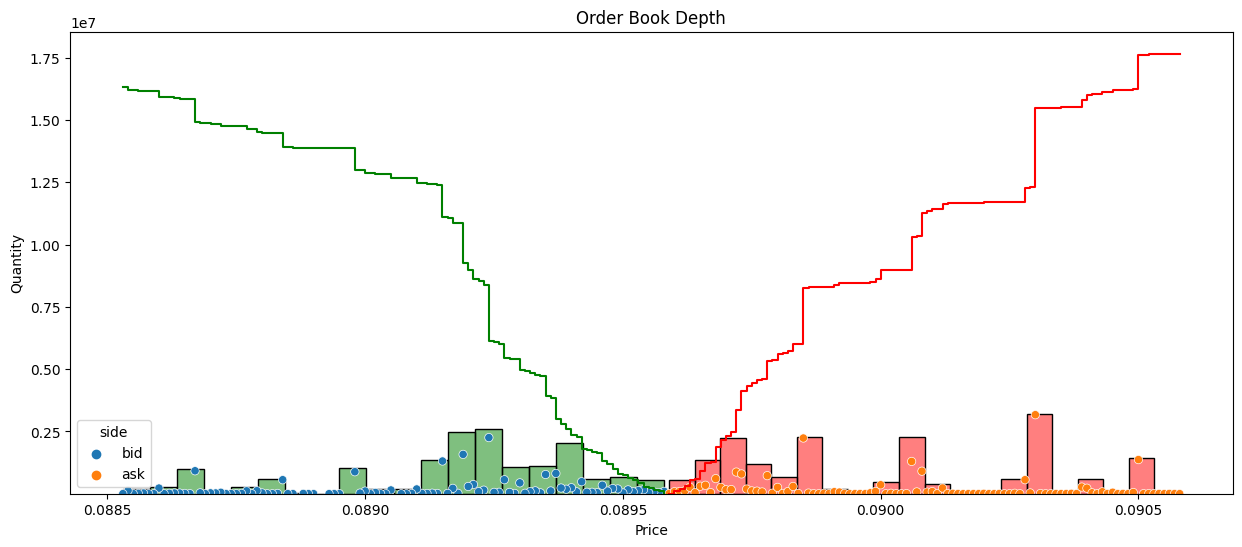

In [354]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.ecdfplot(x="prices", weights="quantities", stat="count", complementary = True,data=df_bid_ask[df_bid_ask.side == 'bid'], ax=ax, color='g')
sns.ecdfplot(x="prices", weights="quantities", stat="count", data=df_bid_ask[df_bid_ask.side == 'ask'], ax=ax, color='r')

sns.histplot(x="prices", weights="quantities", stat="count", data=df_bid_ask[df_bid_ask.side == 'bid'], ax=ax, color='g', alpha=0.5, bins=20)
sns.histplot(x="prices", weights="quantities", stat="count", data=df_bid_ask[df_bid_ask.side == 'ask'], ax=ax, color='r', alpha=0.5, bins= 20)

sns.scatterplot(x="prices", y="quantities", hue="side", data=df_bid_ask, ax=ax)

# Add labels and title
ax.set_xlabel('Price')
ax.set_ylabel('Quantity')
ax.set_title('Order Book Depth');